 Chemin aléatoire (mauvais) : [B, A, E, C, D]
Longueur : 24.43 km


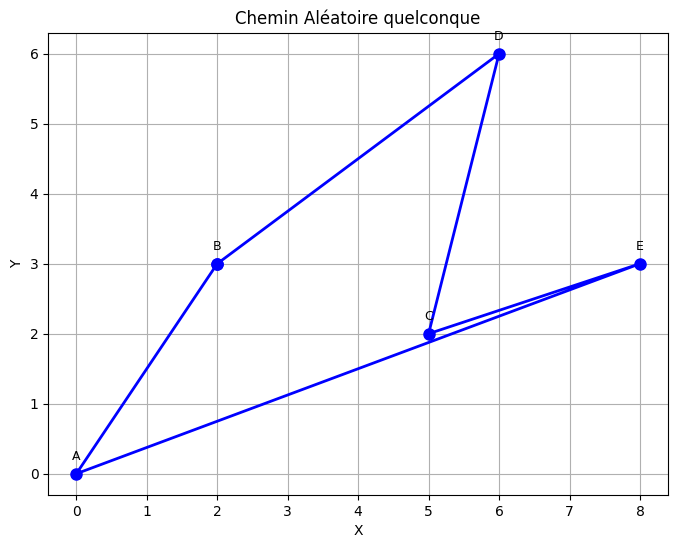

Génération 1: 20.76 km — Chemin: [E, D, B, A, C]
Génération 2: 20.76 km — Chemin: [E, D, B, A, C]
Génération 3: 20.76 km — Chemin: [E, D, B, A, C]
Génération 4: 20.76 km — Chemin: [E, D, B, A, C]
Génération 5: 20.76 km — Chemin: [E, D, B, A, C]
Génération 6: 20.76 km — Chemin: [E, D, B, A, C]
Génération 7: 20.76 km — Chemin: [E, D, B, A, C]
Génération 8: 20.76 km — Chemin: [E, D, B, A, C]
Génération 9: 20.76 km — Chemin: [E, D, B, A, C]
Génération 10: 20.76 km — Chemin: [E, D, B, A, C]
Génération 11: 20.76 km — Chemin: [E, D, B, A, C]
Génération 12: 20.76 km — Chemin: [E, D, B, A, C]
Génération 13: 20.76 km — Chemin: [E, D, B, A, C]
Génération 14: 20.76 km — Chemin: [E, D, B, A, C]
Génération 15: 20.76 km — Chemin: [E, D, B, A, C]
Génération 16: 20.76 km — Chemin: [E, D, B, A, C]
Génération 17: 20.76 km — Chemin: [E, D, B, A, C]
Génération 18: 20.76 km — Chemin: [E, D, B, A, C]
Génération 19: 20.76 km — Chemin: [E, D, B, A, C]
Génération 20: 20.76 km — Chemin: [E, D, B, A, C]
Génératio

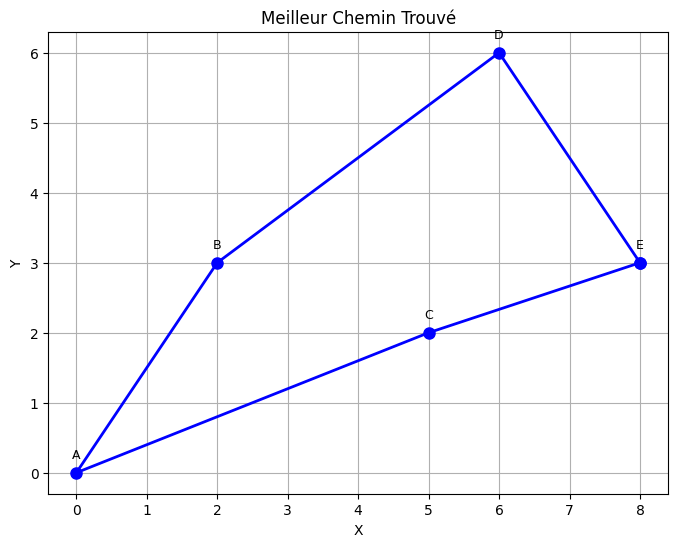

In [6]:
import random
import math
import matplotlib.pyplot as plt


# La structure de la ville
class Ville:
    def __init__(self, nom, x, y):
        self.nom = nom
        self.x = x
        self.y = y

    def distance_vers(self, autre):
        # Distance Euclidienne entre 2 villes
        return math.sqrt((self.x - autre.x)**2 + (self.y - autre.y)**2)

    def __repr__(self):
        return self.nom


# Créer un individu (un chemin aléatoire)

def creer_individu(villes):
    chemin = villes[:]
    random.shuffle(chemin)
    return chemin


# calcul la fitnes d'un chemin, plus c'est court mieux c'est
def longueur_totale(chemin):
    distance = 0
    for i in range(len(chemin)):
        ville_actuelle = chemin[i]
        ville_suivante = chemin[(i + 1) % len(chemin)]  # Revenir au départ
        distance += ville_actuelle.distance_vers(ville_suivante)
    return distance


# Sélectionner les meilleurs individus (les plus courts chemins)
def selection(population, taille_selection):
    population_triee = sorted(population, key=lambda chemin: longueur_totale(chemin))
    return population_triee[:taille_selection]


# Croisement : single-point crossover adapté pour les permutations

def crossover(parent1, parent2):
    point = random.randint(1, len(parent1) - 2)
    enfant = parent1[:point]
    for ville in parent2:
        if ville not in enfant:
            enfant.append(ville)
    return enfant


# Mutation : échange deux villes dans le chemin avec une certaine probabilité

def mutation(chemin, taux_mutation):
    for i in range(len(chemin)):
        if random.random() < taux_mutation:
            j = random.randint(0, len(chemin) - 1)
            chemin[i], chemin[j] = chemin[j], chemin[i]
    return chemin

# lalgorithme principale, avec ces parmetre
genration = 50
taux_mutation = 0.05
taille_population = 5
def algo_genetique(villes, taille_pop=taille_population, generations=genration, taux_mutation=taux_mutation):
    # Créer la population initiale
    population = [creer_individu(villes) for _ in range(taille_pop)]

    for generation in range(generations):
        # Évaluer la population
        population = selection(population, taille_pop // 2) # on divise la taille par deux pour garder la meilleur avec les plus petites distances

        # Reproduire pour compléter la population
        enfants = []
        while len(enfants) + len(population) < taille_pop:
            parent1, parent2 = random.sample(population, 2)
            enfant = crossover(parent1, parent2)
            enfant = mutation(enfant, taux_mutation)
            enfants.append(enfant)

        population += enfants

        # Afficher le meilleur résultat actuel
        meilleur = min(population, key=longueur_totale)
        print(f"Génération {generation+1}: {longueur_totale(meilleur):.2f} km — Chemin: {meilleur}")

    return min(population, key=longueur_totale)

def tracer_chemin(chemin, titre="Chemin"):
    x = [ville.x for ville in chemin] + [chemin[0].x]
    y = [ville.y for ville in chemin] + [chemin[0].y]

    plt.figure(figsize=(8, 6))
    plt.plot(x, y, 'o-', color='blue', linewidth=2, markersize=8)
    for i, ville in enumerate(chemin):
        plt.text(ville.x, ville.y + 0.2, ville.nom, ha='center', fontsize=9)
    plt.title(titre)
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.grid(True)
    plt.show()


# appel dans le progrmme  principale
if __name__ == "__main__":
    #appel de la class avec ces deux parametres en convertissant en une list
    villes = [
        Ville("A", 0, 0),
        Ville("B", 2, 3),
        Ville("C", 5, 2),
        Ville("D", 6, 6),
        Ville("E", 8, 3)
    ]
   # vill = ["Paris", "Lyon", "kazan", "Toulouse", "Mouscou", "Barcelona"]
    #villes = [Ville(nom, i, i**2)) for i, nom in enumerate(vill)]

    # Montrer un chemin aleatoire (mauvais)
    chemin_random = creer_individu(villes)
    print(" Chemin aléatoire (mauvais) :", chemin_random)
    print(f"Longueur : {longueur_totale(chemin_random):.2f} km")
    tracer_chemin(chemin_random, titre="Chemin Aléatoire quelconque")

    # le meiilleur chemien et l'affichage du chemin
    meilleur_chemin = algo_genetique(villes)
    print("\n")
    print("Meilleur chemin trouvé :", meilleur_chemin)
    print(f"Longueur : {longueur_totale(meilleur_chemin):.2f} km")
    tracer_chemin(meilleur_chemin, titre="Meilleur Chemin Trouvé")



In [29]:
lis = ['diallo', 'mamadou']

random.sample(lis, 1)

['diallo']